MIMIC-III Clinical Dataset Visualization

In [2]:
import pandas as pd
import numpy as np
import gzip
from google.colab import drive
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [6]:
#Load patients data
d1=files.upload()
patient_df=pd.read_csv('PATIENTS.csv.gz',compression='gzip')
patient_df.info()

Saving PATIENTS.csv.gz to PATIENTS.csv (1).gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       46520 non-null  int64 
 1   SUBJECT_ID   46520 non-null  int64 
 2   GENDER       46520 non-null  object
 3   DOB          46520 non-null  object
 4   DOD          15759 non-null  object
 5   DOD_HOSP     9974 non-null   object
 6   DOD_SSN      13378 non-null  object
 7   EXPIRE_FLAG  46520 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


In [7]:
#load Admission data
d2=files.upload()
admission_df=pd.read_csv('ADMISSIONS.csv.gz',compression='gzip')
admission_df.info()

Saving ADMISSIONS.csv.gz to ADMISSIONS.csv (1).gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null

In [8]:
#Load Diagnosis ICS Data
d3=files.upload()
diagnoses_icd_df=pd.read_csv('DIAGNOSES_ICD.csv.gz',compression='gzip')
diagnoses_icd_df.info()

Saving DIAGNOSES_ICD.csv.gz to DIAGNOSES_ICD.csv (1).gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [ ]:
# Read the file from the google drive
"""drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/mimic-iii-clinical-database-1.4/PATIENTS.csv.gz'
with gzip.open(file_path, 'rt') as f:
    patient_df = pd.read_csv(f)
print("Patient Table")
print(patient_df.head(1))

file_path = '/content/drive/MyDrive/mimic-iii-clinical-database-1.4/ADMISSIONS.csv.gz'
with gzip.open(file_path, 'rt') as f:
    admission_df = pd.read_csv(f)
print("Admissions Table")
print(admission_df.head(1))

file_path = '/content/drive/MyDrive/mimic-iii-clinical-database-1.4/DIAGNOSES_ICD.csv.gz'
with gzip.open(file_path, 'rt') as f:
    diagnoses_icd_df = pd.read_csv(f)
print("Diagnosis ICD Table")
print(diagnoses_icd_df.head(1)) """

In [ ]:
patient_df.info()

In [ ]:
admission_df.info()

In [ ]:
diagnoses_icd_df.info()

In [12]:
# Unique Discharge loaction in the admissions table
print(admission_df['DISCHARGE_LOCATION'].unique())

['DISC-TRAN CANCER/CHLDRN H' 'HOME HEALTH CARE' 'HOME' 'DEAD/EXPIRED'
 'REHAB/DISTINCT PART HOSP' 'LONG TERM CARE HOSPITAL'
 'DISC-TRAN TO FEDERAL HC' 'SNF' 'SHORT TERM HOSPITAL'
 'HOSPICE-MEDICAL FACILITY' 'HOME WITH HOME IV PROVIDR' 'HOSPICE-HOME'
 'LEFT AGAINST MEDICAL ADVI' 'DISCH-TRAN TO PSYCH HOSP' 'OTHER FACILITY'
 'ICF' 'SNF-MEDICAID ONLY CERTIF']


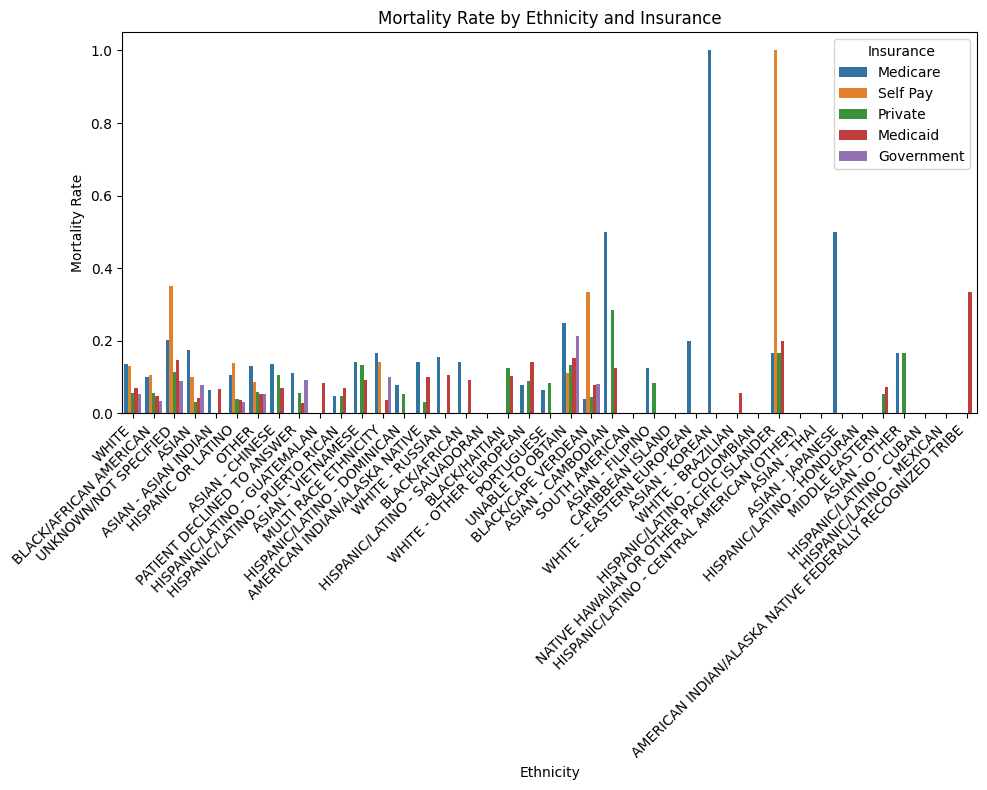

In [13]:
# Visualization of Mortality Rate by Ethnicity and Insurance
df_mortality = pd.merge(patient_df, admission_df, on='SUBJECT_ID')
#df_mortality = pd.merge(df_mortality, diagnoses_icd_df, on=['SUBJECT_ID', 'HADM_ID'], how='left')
#print(df_mortality.head(1))

df_mortality['mortality'] = df_mortality['DISCHARGE_LOCATION'].apply(lambda x: 1 if x == 'DEAD/EXPIRED' else 0)

# Plot of Mortality Rate by Ethnicity and Insurance
plt.figure(figsize=(10, 8))
sns.barplot(x='ETHNICITY', y='mortality', hue='INSURANCE', data=df_mortality, errorbar=None)
plt.xlabel('Ethnicity')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by Ethnicity and Insurance')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Insurance', loc='upper right')
plt.tight_layout()
plt.show()

In [15]:
#Load ICU Stays data
d1=files.upload()
icustay_df=pd.read_csv('ICUSTAYS.csv.gz',compression='gzip')
icustay_df.info()

Saving ICUSTAYS.csv.gz to ICUSTAYS.csv (1).gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW_ID          61532 non-null  int64  
 1   SUBJECT_ID      61532 non-null  int64  
 2   HADM_ID         61532 non-null  int64  
 3   ICUSTAY_ID      61532 non-null  int64  
 4   DBSOURCE        61532 non-null  object 
 5   FIRST_CAREUNIT  61532 non-null  object 
 6   LAST_CAREUNIT   61532 non-null  object 
 7   FIRST_WARDID    61532 non-null  int64  
 8   LAST_WARDID     61532 non-null  int64  
 9   INTIME          61532 non-null  object 
 10  OUTTIME         61522 non-null  object 
 11  LOS             61522 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB


In [16]:
#Load D_ICD_DIAGNOSES data
d1=files.upload()
d_icd_diagnoses_df=pd.read_csv('D_ICD_DIAGNOSES.csv.gz',compression='gzip')
d_icd_diagnoses_df.info()

Saving D_ICD_DIAGNOSES.csv.gz to D_ICD_DIAGNOSES.csv.gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       14567 non-null  int64 
 1   ICD9_CODE    14567 non-null  object
 2   SHORT_TITLE  14567 non-null  object
 3   LONG_TITLE   14567 non-null  object
dtypes: int64(1), object(3)
memory usage: 455.3+ KB


In [ ]:
""""file_path = '/content/drive/MyDrive/mimic-iii-clinical-database-1.4/ICUSTAYS.csv.gz'
with gzip.open(file_path, 'rt') as f:
    icustay_df = pd.read_csv(f)
print("Diagnosis ICD Table")
print(icustay_df.head(1))

file_path = '/content/drive/MyDrive/mimic-iii-clinical-database-1.4/D_ICD_DIAGNOSES.csv.gz'
with gzip.open(file_path, 'rt') as f:
    d_icd_diagnoses_df = pd.read_csv(f)
print("D ICD Diagnosis Table")
print(d_icd_diagnoses_df.head(1))"""

In [17]:
d_icd_diagnoses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       14567 non-null  int64 
 1   ICD9_CODE    14567 non-null  object
 2   SHORT_TITLE  14567 non-null  object
 3   LONG_TITLE   14567 non-null  object
dtypes: int64(1), object(3)
memory usage: 455.3+ KB


In [18]:
icustay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW_ID          61532 non-null  int64  
 1   SUBJECT_ID      61532 non-null  int64  
 2   HADM_ID         61532 non-null  int64  
 3   ICUSTAY_ID      61532 non-null  int64  
 4   DBSOURCE        61532 non-null  object 
 5   FIRST_CAREUNIT  61532 non-null  object 
 6   LAST_CAREUNIT   61532 non-null  object 
 7   FIRST_WARDID    61532 non-null  int64  
 8   LAST_WARDID     61532 non-null  int64  
 9   INTIME          61532 non-null  object 
 10  OUTTIME         61522 non-null  object 
 11  LOS             61522 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB


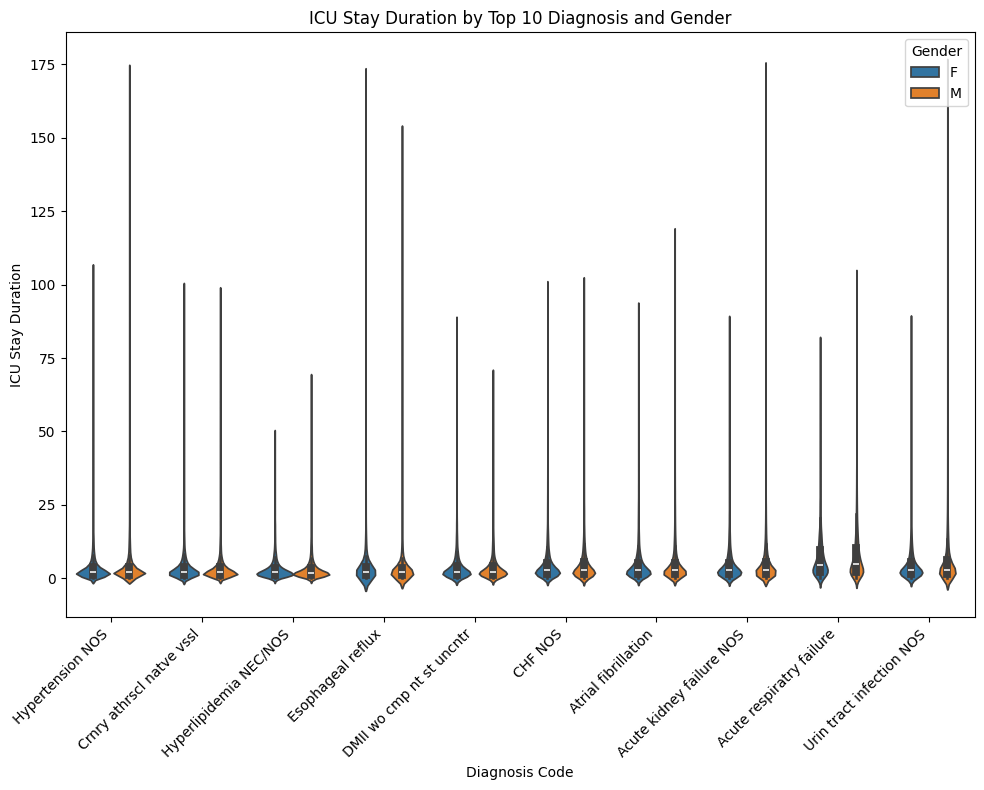

In [19]:
# Visualization of ICU Stay Duration by Gender and Diagnosis
df_icu_stay = pd.merge(admission_df, icustay_df, on='HADM_ID')
df_icu_stay = df_icu_stay.drop('SUBJECT_ID_x', axis=1)
df_icu_stay = df_icu_stay.rename(columns={'SUBJECT_ID_y': 'SUBJECT_ID'})
df_icu_stay = pd.merge(df_icu_stay, patient_df, on='SUBJECT_ID')
df_icu_stay = df_icu_stay.drop('ROW_ID_x', axis=1)
df_icu_stay = df_icu_stay.rename(columns={'ROW_ID_y': 'ROW_ID'})

icd_diagnosis_title = pd.merge(diagnoses_icd_df, d_icd_diagnoses_df, on='ICD9_CODE')
df_icu_stay = pd.merge(df_icu_stay, icd_diagnosis_title, on=['SUBJECT_ID', 'HADM_ID'], how='left')

# Top 10 Diagnosis code
top_10_diagnosis = df_icu_stay['ICD9_CODE'].value_counts().head(10).index.tolist()
df_icu_stay_top10 = df_icu_stay[df_icu_stay['ICD9_CODE'].isin(top_10_diagnosis)]


# Plot of ICU Stay Duration by Gender and Diagnosis
plt.figure(figsize=(10, 8))
sns.violinplot(x='SHORT_TITLE', y='LOS', hue='GENDER', data=df_icu_stay_top10)
plt.xlabel('Diagnosis Code')
plt.ylabel('ICU Stay Duration')
plt.title('ICU Stay Duration by Top 10 Diagnosis and Gender')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

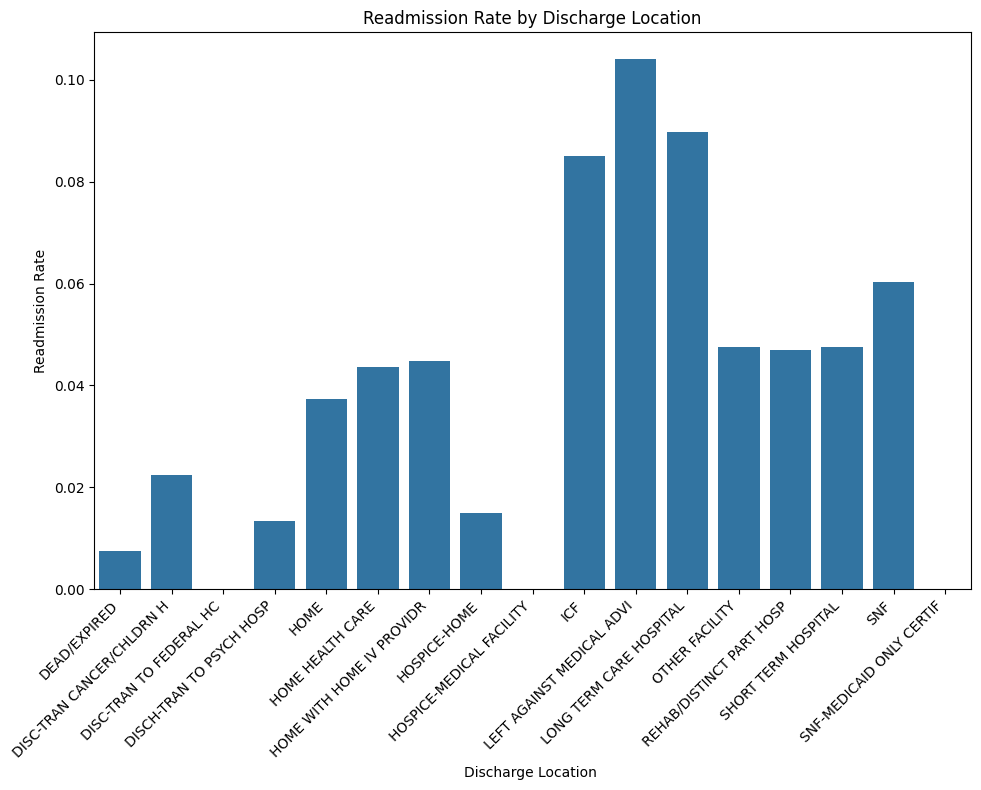

In [24]:
# Visualization of Readmission Rate By Discharge Location
df_readmission = pd.merge(patient_df, admission_df, on='SUBJECT_ID')

df_readmission = df_readmission.sort_values(by=['SUBJECT_ID','ADMITTIME'])
df_readmission['ADMITTIME'] = pd.to_datetime(df_readmission['ADMITTIME'])
df_readmission['DISCHTIME'] = pd.to_datetime(df_readmission['DISCHTIME'])

df_readmission['next_admittime'] = df_readmission.groupby('SUBJECT_ID')['ADMITTIME'].shift(-1)

df_readmission['time_readmission'] = df_readmission['next_admittime'] - df_readmission['ADMITTIME']

df_readmission['readmitted'] = (df_readmission['time_readmission'] <= pd.Timedelta(days=30)) & (df_readmission['time_readmission'].notna())

# Readmission Rate by discharge location
readmission_rate = df_readmission.groupby('DISCHARGE_LOCATION')['readmitted'].mean()

# Plot of Readmission Rate by Discharge Location
plt.figure(figsize=(10, 8))
sns.barplot(x=readmission_rate.index, y=readmission_rate)
plt.xlabel('Discharge Location ')
plt.ylabel('Readmission Rate')
plt.title('Readmission Rate by Discharge Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
#Load PRESCRIPTIONS data
d1=files.upload()
prescription_df=pd.read_csv('PRESCRIPTIONS.csv.gz',compression='gzip')
prescription_df.info()

Saving PRESCRIPTIONS.csv.gz to PRESCRIPTIONS.csv.gz


<ipython-input-22-90b34446a033>:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_df=pd.read_csv('PRESCRIPTIONS.csv.gz',compression='gzip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156450 entries, 0 to 4156449
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ROW_ID             int64  
 1   SUBJECT_ID         int64  
 2   HADM_ID            int64  
 3   ICUSTAY_ID         float64
 4   STARTDATE          object 
 5   ENDDATE            object 
 6   DRUG_TYPE          object 
 7   DRUG               object 
 8   DRUG_NAME_POE      object 
 9   DRUG_NAME_GENERIC  object 
 10  FORMULARY_DRUG_CD  object 
 11  GSN                object 
 12  NDC                float64
 13  PROD_STRENGTH      object 
 14  DOSE_VAL_RX        object 
 15  DOSE_UNIT_RX       object 
 16  FORM_VAL_DISP      object 
 17  FORM_UNIT_DISP     object 
 18  ROUTE              object 
dtypes: float64(2), int64(3), object(14)
memory usage: 602.5+ MB


In [ ]:
"""file_path = '/content/drive/MyDrive/mimic-iii-clinical-database-1.4/PRESCRIPTIONS.csv.gz'
with gzip.open(file_path, 'rt') as f:
    prescription_df = pd.read_csv(f)
print("Prescription Table")
print(prescription_df.head(1))"""

In [25]:
prescription_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156450 entries, 0 to 4156449
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ROW_ID             int64  
 1   SUBJECT_ID         int64  
 2   HADM_ID            int64  
 3   ICUSTAY_ID         float64
 4   STARTDATE          object 
 5   ENDDATE            object 
 6   DRUG_TYPE          object 
 7   DRUG               object 
 8   DRUG_NAME_POE      object 
 9   DRUG_NAME_GENERIC  object 
 10  FORMULARY_DRUG_CD  object 
 11  GSN                object 
 12  NDC                float64
 13  PROD_STRENGTH      object 
 14  DOSE_VAL_RX        object 
 15  DOSE_UNIT_RX       object 
 16  FORM_VAL_DISP      object 
 17  FORM_UNIT_DISP     object 
 18  ROUTE              object 
dtypes: float64(2), int64(3), object(14)
memory usage: 602.5+ MB


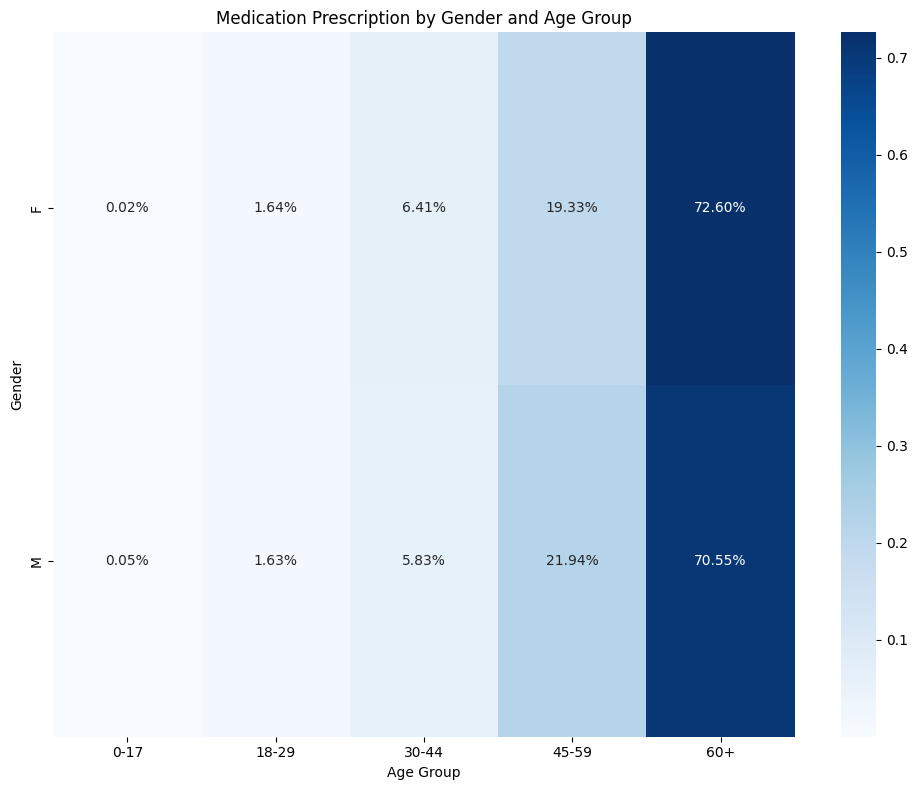

In [26]:
# Visualization of Medication Prescription by Gender and Age Group
df_prescription = pd.merge(patient_df, prescription_df, on='SUBJECT_ID')
df_prescription['DOD'] = pd.to_datetime(df_prescription['DOD'])
df_prescription['DOB'] = pd.to_datetime(df_prescription['DOB'])
#df_prescription['AGE'] = (df_prescription['DOD'] - df_prescription['DOB']).dt.days // 365
df_prescription['AGE'] = df_prescription.apply(lambda row: relativedelta(row['DOD'], row['DOB']).years if pd.notna(row['DOD']) else None, axis=1)
df_prescription['Age_Group'] = pd.cut(df_prescription['AGE'], bins=[0, 18, 30, 45, 60, 100], labels=['0-17', '18-29', '30-44', '45-59', '60+'])

contingency_table = pd.crosstab(df_prescription['GENDER'], df_prescription['Age_Group'], df_prescription['DRUG'], aggfunc='count')

# Plot of Medication Prescription by Gender and Age Group
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table.div(contingency_table.sum(axis=1), axis=0), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.title('Medication Prescription by Gender and Age Group')
plt.tight_layout()
plt.show()


In [27]:
#Load PRESCRIPTIONS data
d7=files.upload()
services_df=pd.read_csv('SERVICES.csv.gz',compression='gzip')
services_df.info()

Saving SERVICES.csv.gz to SERVICES.csv.gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73343 entries, 0 to 73342
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ROW_ID        73343 non-null  int64 
 1   SUBJECT_ID    73343 non-null  int64 
 2   HADM_ID       73343 non-null  int64 
 3   TRANSFERTIME  73343 non-null  object
 4   PREV_SERVICE  14668 non-null  object
 5   CURR_SERVICE  73343 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.4+ MB


In [ ]:
"""file_path = '/content/drive/MyDrive/mimic-iii-clinical-database-1.4/SERVICES.csv.gz'
with gzip.open(file_path, 'rt') as f:
    services_df = pd.read_csv(f)
print("Cargiver Table")
print(services_df.head(1))"""

In [28]:
# Visualization of Serives by Age Group and Gender
df_services = pd.merge(patient_df, services_df, on='SUBJECT_ID')
df_services['DOD'] = pd.to_datetime(df_services['DOD'])
df_services['DOB'] = pd.to_datetime(df_services['DOB'])
df_services['AGE'] = df_services.apply(lambda row: relativedelta(row['DOD'], row['DOB']).years if pd.notna(row['DOD']) else None, axis=1)
df_services['Age_Group'] = pd.cut(df_services['AGE'], bins=[0, 18, 30, 45, 60, 100], labels=['0-17', '18-29', '30-44', '45-59', '60+'])

# df_services['CURR_SERVICE'] = df_services['CURR_SERVICE'].astype(str)
# df_services = df_services.dropna(subset=['CURR_SERVICE'])
# df_services = df_services[df_services['CURR_SERVICE'].str.strip() != ' ']

top10_service = df_services['CURR_SERVICE'].value_counts().head(10)
df_top10_services = df_services[df_services['CURR_SERVICE'].isin(top10_service.index)]

import plotly.express as px

# Plot of Services by Age Group and Gender
fig = px.histogram(df_top10_services, x='CURR_SERVICE', color='Age_Group', facet_col='GENDER', title='Top 10 Services by Age Group and Gender')
fig.update_layout(xaxis_title="Service",
                  yaxis_title="Count",
                  xaxis_tickangle=-45,
                  showlegend=True,
                  legend_title_text='Gender',
                  height=950,
                  margin=dict(l=50, r=50, t=50, b=50)
                  )
fig.update_xaxes(title_text="Service")
fig.update_yaxes(title_text="Count")
fig.show()